## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
from janitor import clean_names

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [5]:
ruta_proyecto = 'C:/Users/User/Desktop/DS4B/03_MACHINE_LEARNING/08_CASOS/RIESGOS'

Sustituir el nombre_fichero_datos.

In [6]:
nombre_fichero_datos = 'trabajo.csv'

Cargar los datos.

In [8]:
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col='id_cliente')
df

,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,...,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
id_cliente,,,,,,,,,,,,,,,,,,,,,
137387967,Hvac technician,3 years,54000.0,Source Verified,A,19.31,MORTGAGE,2.0,10.0,33.3,...,NaN,NaN,debt_consolidation,15000.0,7.21,36 months,464.60,2669.06,Current,0.00
46641215,Banker,5 years,135000.0,Verified,A,14.68,RENT,0.0,19.0,0.0,...,NaN,NaN,debt_consolidation,24000.0,6.39,36 months,734.38,24000.00,Fully Paid,0.00
87998444,executive director,9 years,188000.0,Source Verified,B,11.69,MORTGAGE,3.0,15.0,0.0,...,NaN,NaN,credit_card,27000.0,8.99,60 months,560.35,12443.00,Current,0.00
131289518,NaN,10+ years,72777.0,Source Verified,D,24.74,MORTGAGE,2.0,10.0,33.3,...,NaN,NaN,home_improvement,25000.0,21.85,60 months,688.35,2811.27,Current,0.00
77861711,Correctional officer,10+ years,50000.0,Verified,C,29.31,MORTGAGE,1.0,8.0,0.0,...,NaN,NaN,debt_consolidation,14400.0,15.31,36 months,501.37,2310.49,Charged Off,6430.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999338,T. Rowe Price,4 years,55000.0,Verified,B,29.26,RENT,NaN,7.0,NaN,...,NaN,Borrower added on 11/01/11 > Looking to use ...,debt_consolidation,20000.0,12.69,60 months,451.90,20000.00,Fully Paid,0.00
73222117,Executive Assistant,10+ years,85000.0,Verified,B,33.05,RENT,1.0,25.0,90.0,...,NaN,NaN,debt_consolidation,3000.0,9.75,36 months,96.45,3000.00,Fully Paid,0.00
129396054,Field Manager,10+ years,55000.0,Source Verified,D,15.36,OWN,1.0,7.0,75.0,...,NaN,NaN,debt_consolidation,14400.0,17.47,60 months,361.53,1975.94,Current,0.00


## VISIÓN GENERAL

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 137387967 to 121031962
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   empleo                       129738 non-null  object 
 1   antigüedad_empleo            131037 non-null  object 
 2   ingresos                     140000 non-null  float64
 3   ingresos_verificados         140000 non-null  object 
 4   rating                       140000 non-null  object 
 5   dti                          139900 non-null  float64
 6   vivienda                     140000 non-null  object 
 7   num_hipotecas                136846 non-null  float64
 8   num_lineas_credito           139998 non-null  float64
 9   porc_tarjetas_75p            135276 non-null  float64
 10  porc_uso_revolving           139887 non-null  float64
 11  num_cancelaciones_12meses    139993 non-null  float64
 12  num_derogatorios             139998 non-null  float6

## TIPOS DE DATOS

### Identificación

In [11]:
df.dtypes

empleo                          object
antigüedad_empleo               object
ingresos                       float64
ingresos_verificados            object
rating                          object
dti                            float64
vivienda                        object
num_hipotecas                  float64
num_lineas_credito             float64
porc_tarjetas_75p              float64
porc_uso_revolving             float64
num_cancelaciones_12meses      float64
num_derogatorios               float64
num_meses_desde_ult_retraso    float64
id_prestamo                    float64
descripcion                     object
finalidad                       object
principal                      float64
tipo_interes                   float64
num_cuotas                      object
imp_cuota                      float64
imp_amortizado                 float64
estado                          object
imp_recuperado                 float64
dtype: object

## VALORES ÚNICOS

### Identificación

In [12]:
df.nunique().sort_values()

id_prestamo                        0
num_cuotas                         2
ingresos_verificados               3
vivienda                           6
num_cancelaciones_12meses          7
rating                             7
estado                             8
antigüedad_empleo                 11
finalidad                         14
num_derogatorios                  17
num_hipotecas                     26
num_lineas_credito                63
num_meses_desde_ult_retraso      129
porc_tarjetas_75p                172
tipo_interes                     588
porc_uso_revolving              1100
principal                       1471
dti                             5308
descripcion                     7814
imp_recuperado                 10601
ingresos                       11660
imp_cuota                      33724
empleo                         54590
imp_amortizado                 57713
dtype: int64

### Corrección

In [13]:
df.drop(columns = 'id_prestamo', inplace = True)

## DUPLICADOS

### Identificación

In [14]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [15]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [16]:
num = df.select_dtypes(include='number').copy()

## GESTIÓN DE CATEGÓRICAS

### Nulos

#### Identificación

In [17]:
cat.isna().sum().sort_values(ascending = False)

descripcion             132162
empleo                   10262
antigüedad_empleo         8963
ingresos_verificados         0
rating                       0
vivienda                     0
finalidad                    0
num_cuotas                   0
estado                       0
dtype: int64

In [18]:
cat.descripcion.value_counts(dropna=False)

descripcion
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [19]:
cat.empleo.value_counts(dropna=False)

empleo
NaN                      10262
Teacher                   2509
Manager                   2168
Owner                     1345
Registered Nurse           994
                         ...  
Food and beverage            1
Senior JDE CNC               1
Dr Jacqueline Heller         1
Menu Development Chef        1
Owner & President            1
Name: count, Length: 54591, dtype: int64

In [20]:
cat.antigüedad_empleo.value_counts(dropna=False)

antigüedad_empleo
10+ years    46250
2 years      12491
< 1 year     11864
3 years      11271
1 year        9146
NaN           8963
5 years       8744
4 years       8429
6 years       6374
7 years       5753
8 years       5748
9 years       4967
Name: count, dtype: int64

#### Corrección

##### Imputar por un valor

###### Variables a imputar

In [21]:
var_imputar_valor = ['descripcion','empleo', 'antigüedad_empleo']

###### Valor por el que imputar

In [22]:
valor = 'DESCONOCIDO'

###### Imputar

In [23]:
cat[var_imputar_valor] = cat[var_imputar_valor].fillna(valor)

### Atípicos

#### Categorías poco frecuentes

In [25]:
cat.nunique()

empleo                  54591
antigüedad_empleo          12
ingresos_verificados        3
rating                      7
vivienda                    6
descripcion              7815
finalidad                  14
num_cuotas                  2
estado                      8
dtype: int64

## GESTIÓN DE NUMÉRICAS

### Nulos

#### Identificación

In [26]:
num.isna().sum().sort_values(ascending = False)

num_meses_desde_ult_retraso    71841
porc_tarjetas_75p               4724
num_hipotecas                   3154
porc_uso_revolving               113
dti                              100
num_cancelaciones_12meses          7
num_lineas_credito                 2
num_derogatorios                   2
ingresos                           0
principal                          0
tipo_interes                       0
imp_cuota                          0
imp_amortizado                     0
imp_recuperado                     0
dtype: int64

<Axes: xlabel='num_meses_desde_ult_retraso'>

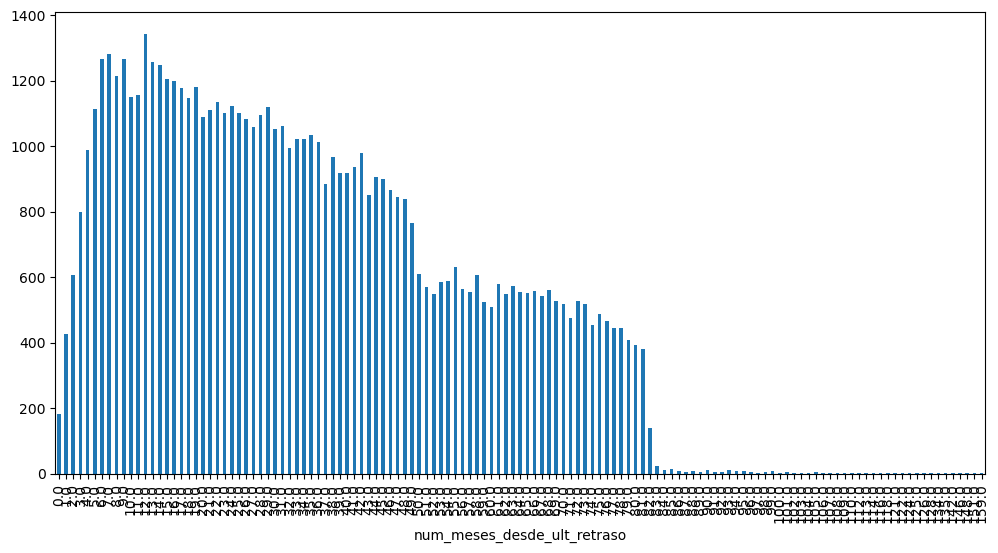

In [27]:
num.num_meses_desde_ult_retraso.value_counts().sort_index().plot.bar(figsize=(12,6))

In [45]:
num.loc[num.dti>100].dti.value_counts().sort_index()

dti
100.23    1
100.40    1
100.45    1
100.68    1
101.20    1
         ..
599.28    1
707.60    1
756.46    1
815.66    1
999.00    8
Name: count, Length: 158, dtype: int64

Hay pocos ceros por lo que vamos a hacer la asunción de que los nulos representan 0. Esto se debe a la naturaleza de la variable donde creemos que debería haber mayor proporción de 0.


#### Corrección

###### Imputar con 0


In [28]:
num.fillna(0, inplace=True)

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [29]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [30]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [31]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

###### Variables a aplicar

In [32]:
var_atipicos_dt = ['ingresos', 'principal', 'imp_cuota', 'imp_recuperado']

###### Aplicar

In [33]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


ingresos:

ingresos
500000.0    40
450000.0    37
750000.0    18
600000.0    15
650000.0    15
            ..
456000.0     1
695000.0     1
624706.0     1
819348.0     1
464000.0     1
Name: count, Length: 133, dtype: int64

principal:

Series([], Name: count, dtype: int64)

imp_cuota:

imp_cuota
1566.80    2
1607.80    1
1535.71    1
1714.54    1
1587.02    1
Name: count, dtype: int64

imp_recuperado:

imp_recuperado
4000.00    6
3500.00    4
6000.00    3
8500.00    3
3600.00    3
          ..
8320.00    1
3795.13    1
6960.00    1
3633.34    1
3500.75    1
Name: count, Length: 1559, dtype: int64


In [34]:
num.ingresos.describe()

count    1.400000e+05
mean     7.821503e+04
std      9.114483e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.099920e+07
Name: ingresos, dtype: float64

##### Corrección

Eliminar los registros que tengan ingresos superiores a 300.000$

*Cuidado: Si se eliminan registros hay que eliminarlos tanto de cat como de num*

###### Variables a aplicar

In [35]:
a_eliminar = num.loc[num.ingresos>300000].index.values
a_eliminar

array([ 97629676, 115087816,  30115373,  88149047,  58654033,  96702950,
        83678168, 128295694,  57316403,  75468055, 104953803,  55380417,
        60525500,  59101444,  74703269,  70631462, 114093587, 121891976,
          458760, 145133997, 141509839,  99967449,  74845067, 113905376,
        69967314,  69127903,  79015002,  33371205, 136270374,  97457564,
         9746316, 110905405, 128843574,  93634763,  75358546,  39559363,
        70592833, 142502569, 104959821, 107733336,  77517938,  93092543,
       122689487,  57074442,  60831304,  40942257, 116881558, 115085050,
         3630153,  78419419,  79390430, 141591423,  67427919,  92659557,
       102523636, 128067879,  65087421,    225812, 131383380, 109322909,
       141468030,  92035926, 137347897,  53252537,  60873988, 144125851,
        12938159, 125518577,  65795964, 125737574, 132251779,   4044958,
       134323203, 104319520, 145242693,   2367546,  96979795,    620850,
        40385541,  74585468, 143147174, 124877413, 

###### Aplicar

In [36]:
cat = cat[~cat.index.isin(a_eliminar)]
num = num[~num.index.isin(a_eliminar)]

Comprobamos

In [37]:
num.ingresos.describe()

count    139091.000000
mean      74989.816068
std       42162.119725
min           0.000000
25%       46000.000000
50%       65000.000000
75%       92000.000000
max      300000.000000
Name: ingresos, dtype: float64

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en df, cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

### Definir los nombres de los archivos

In [38]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [39]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)